# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '+')}&appid=weather_api_key&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
         # Get the JSON response from the API
        response = requests.get(city_url)
        response_json = response.json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = datetime.utcfromtimestamp(response_json["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | papatowai
City not found. Skipping...
Processing Record 3 of Set 1 | celestun
City not found. Skipping...
Processing Record 4 of Set 1 | waitangi
City not found. Skipping...
Processing Record 5 of Set 1 | saldanha
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 7 of Set 1 | brookings
City not found. Skipping...
Processing Record 8 of Set 1 | college
City not found. Skipping...
Processing Record 9 of Set 1 | georgetown
City not found. Skipping...
Processing Record 10 of Set 1 | ust-nera
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
City not found. Skipping...
Processing Record 12 of Set 1 | cidreira
City not found. Skipping...
Processing Record 13 of Set 1 | nuuk
City not found. Skipping...
Processing Record 14 of Set 1 | iqaluit
City not 

City not found. Skipping...
Processing Record 17 of Set 3 | alo
City not found. Skipping...
Processing Record 18 of Set 3 | la passe
City not found. Skipping...
Processing Record 19 of Set 3 | dryden
City not found. Skipping...
Processing Record 20 of Set 3 | mahina
City not found. Skipping...
Processing Record 21 of Set 3 | uturoa
City not found. Skipping...
Processing Record 22 of Set 3 | albany
City not found. Skipping...
Processing Record 23 of Set 3 | tongouson
City not found. Skipping...
Processing Record 24 of Set 3 | jisr ez zarqa
City not found. Skipping...
Processing Record 25 of Set 3 | salinopolis
City not found. Skipping...
Processing Record 26 of Set 3 | mahibadhoo
City not found. Skipping...
Processing Record 27 of Set 3 | port blair
City not found. Skipping...
Processing Record 28 of Set 3 | langsa
City not found. Skipping...
Processing Record 29 of Set 3 | kyzyl-suu
City not found. Skipping...
Processing Record 30 of Set 3 | akureyri
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 35 of Set 5 | ciudad lazaro cardenas
City not found. Skipping...
Processing Record 36 of Set 5 | ginir
City not found. Skipping...
Processing Record 37 of Set 5 | camana
City not found. Skipping...
Processing Record 38 of Set 5 | nagqu
City not found. Skipping...
Processing Record 39 of Set 5 | sandnessjoen
City not found. Skipping...
Processing Record 40 of Set 5 | wanning
City not found. Skipping...
Processing Record 41 of Set 5 | ryotsu-minato
City not found. Skipping...
Processing Record 42 of Set 5 | brak
City not found. Skipping...
Processing Record 43 of Set 5 | pacific grove
City not found. Skipping...
Processing Record 44 of Set 5 | muisne
City not found. Skipping...
Processing Record 45 of Set 5 | alice springs
City not found. Skipping...
Processing Record 46 of Set 5 | san julian
City not found. Skipping...
Processing Record 47 of Set 5 | borogontsy
City not found. Skipping...
Processing Record 48 of Set 5 | glace bay
City not fo

City not found. Skipping...
Processing Record 3 of Set 8 | l'govskiy
City not found. Skipping...
Processing Record 4 of Set 8 | terrace
City not found. Skipping...
Processing Record 5 of Set 8 | shingu
City not found. Skipping...
Processing Record 6 of Set 8 | palmer
City not found. Skipping...
Processing Record 7 of Set 8 | tolanaro
City not found. Skipping...
Processing Record 8 of Set 8 | salekhard
City not found. Skipping...
Processing Record 9 of Set 8 | lander
City not found. Skipping...
Processing Record 10 of Set 8 | fuglafjordur
City not found. Skipping...
Processing Record 11 of Set 8 | arauca
City not found. Skipping...
Processing Record 12 of Set 8 | iskateley
City not found. Skipping...
Processing Record 13 of Set 8 | san patricio
City not found. Skipping...
Processing Record 14 of Set 8 | lorengau
City not found. Skipping...
Processing Record 15 of Set 8 | rongelap
City not found. Skipping...
Processing Record 16 of Set 8 | at taj
City not found. Skipping...
Processing Re

City not found. Skipping...
Processing Record 21 of Set 10 | oyon
City not found. Skipping...
Processing Record 22 of Set 10 | tralee
City not found. Skipping...
Processing Record 23 of Set 10 | san luis de la loma
City not found. Skipping...
Processing Record 24 of Set 10 | utrik
City not found. Skipping...
Processing Record 25 of Set 10 | mogadishu
City not found. Skipping...
Processing Record 26 of Set 10 | parkent
City not found. Skipping...
Processing Record 27 of Set 10 | barakani
City not found. Skipping...
Processing Record 28 of Set 10 | gamba
City not found. Skipping...
Processing Record 29 of Set 10 | fort mcmurray
City not found. Skipping...
Processing Record 30 of Set 10 | al ghayzah
City not found. Skipping...
Processing Record 31 of Set 10 | bulgan
City not found. Skipping...
Processing Record 32 of Set 10 | bubaque
City not found. Skipping...
Processing Record 33 of Set 10 | mount isa
City not found. Skipping...
Processing Record 34 of Set 10 | sao jose da coroa grande


City not found. Skipping...
Processing Record 38 of Set 12 | steinkjer
City not found. Skipping...
Processing Record 39 of Set 12 | takoradi
City not found. Skipping...
Processing Record 40 of Set 12 | jeju city
City not found. Skipping...
Processing Record 41 of Set 12 | chalastra
City not found. Skipping...
Processing Record 42 of Set 12 | guarapari
City not found. Skipping...
Processing Record 43 of Set 12 | pogranichnyy
City not found. Skipping...
Processing Record 44 of Set 12 | jayapura
City not found. Skipping...
Processing Record 45 of Set 12 | hirara
City not found. Skipping...
Processing Record 46 of Set 12 | shanhaiguan
City not found. Skipping...
Processing Record 47 of Set 12 | cabo san lucas
City not found. Skipping...
Processing Record 48 of Set 12 | pushkinskiye gory
City not found. Skipping...
Processing Record 49 of Set 12 | el granada
City not found. Skipping...
Processing Record 0 of Set 13 | linares
City not found. Skipping...
Processing Record 1 of Set 13 | coos b

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [5]:
# Display sample data
city_data_df.head()

""


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities1.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

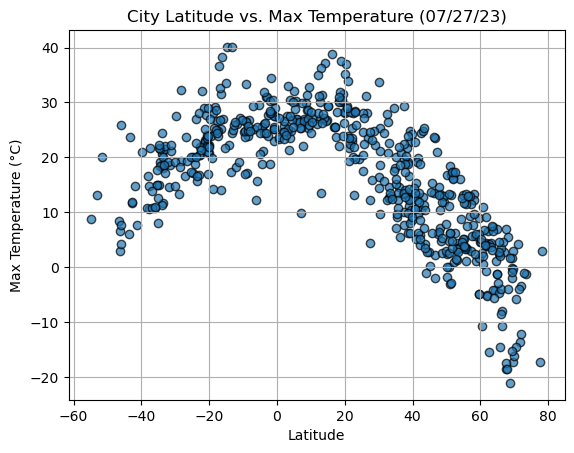

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)

# Set the chart title and labels for the x and y axes
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

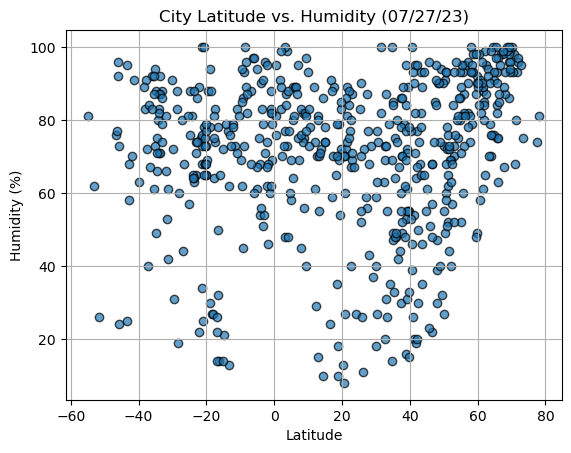

In [9]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)

# Set the chart title and labels for the x and y axes
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

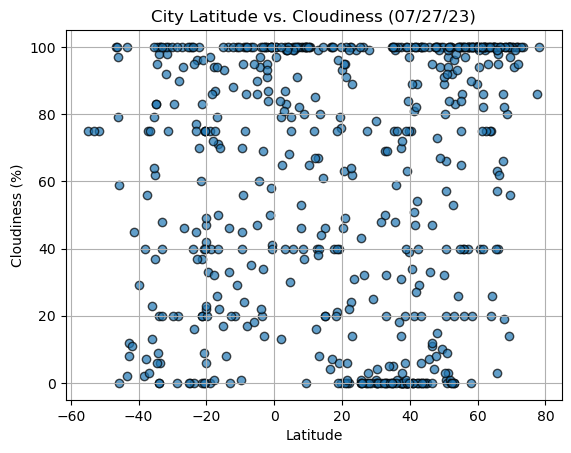

In [10]:
# Build scatter plot for latitude vs.cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)

# Set the chart title and labels for the x and y axes
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add gridlines
plt.grid(True)
           # Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

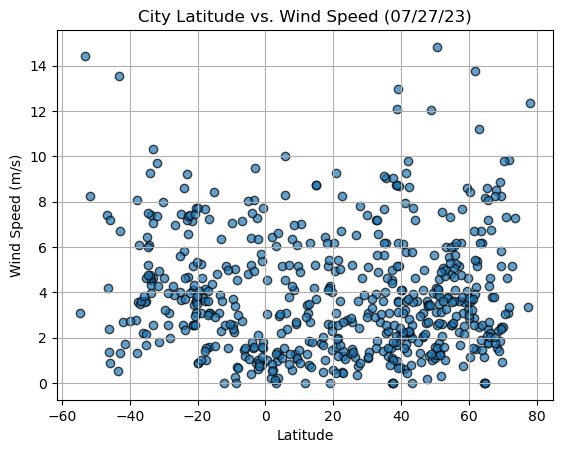

In [11]:
# Build scatter plot for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)

# Set the chart title and labels for the x and y axes
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Add gridlines
plt.grid(True)
           # Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [14]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def create_linear_regression_plot(x_data, y_data, x_label, y_label, hemisphere):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate the regression line values
    regression_line = slope * x_data + intercept
    
    # Create scatter plot
    plt.scatter(x_data, y_data, alpha=0.6)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')
    
    # Set the chart title and labels for the x and y axes
    plt.title(f"{y_label} vs. {x_label} ({hemisphere} Hemisphere)")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add gridlines
    plt.grid(True)
    
    
    # Display the line equation and r-value as annotations on the plot
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (min(x_data), max(y_data)), fontsize=15, color="red")
    
  # Print r value
    print(f"The r-value is: {r_value**2:.2f}")

    # Show plot
    plt.show()



In [15]:
# Separate data for Northern Hemisphere (latitudes greater than or equal to 0) and Southern Hemisphere (latitudes less than 0)

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.72


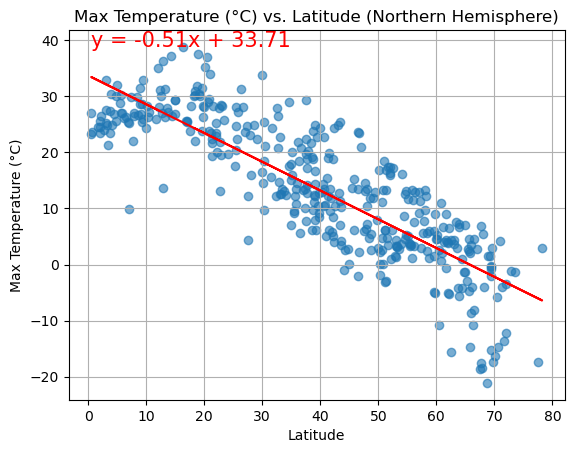

In [17]:
# Linear regression on Northern Hemisphere_temp vs latitude

create_linear_regression_plot(northern_df["Lat"], northern_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern")


The r-value is: 0.41


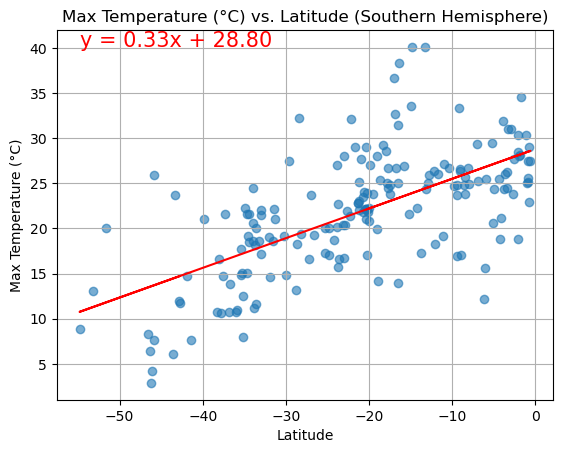

In [18]:
# Linear regression on Southern Hemisphere:Latitude vs Temp
create_linear_regression_plot(southern_df["Lat"], southern_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern")

**Discussion about the linear relationship:** The relationship between Latitude and Temprature remains negative on Northern Hemisphere, but positive on Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06


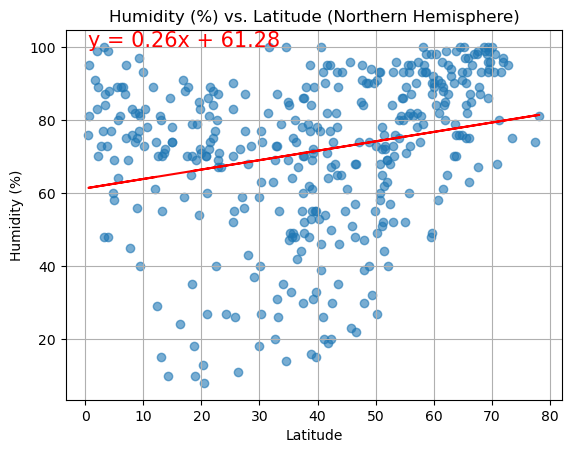

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Humidity vs Latitude
create_linear_regression_plot(northern_df["Lat"], northern_df["Humidity"], "Latitude", "Humidity (%)", "Northern")

The r-value is: 0.00


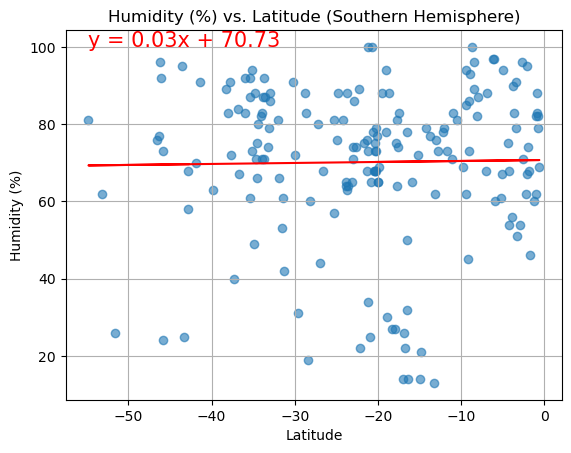

In [20]:

# Linear regression on Southern Hemisphere:Latitude vs Humidity
create_linear_regression_plot(southern_df["Lat"], southern_df["Humidity"], "Latitude", "Humidity (%)", "Southern")



**Discussion about the linear relationship:** on the north the relationship between Latitude vs Humidity is posive, but is likely not related on the Northern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02


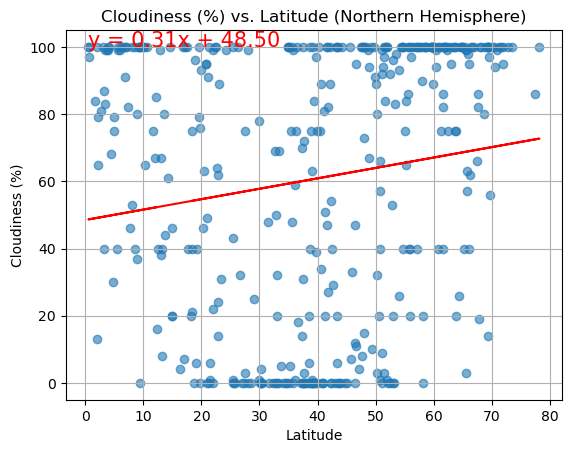

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Latitude vs Cloudiness
create_linear_regression_plot(northern_df["Lat"], northern_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern")


The r-value is: 0.02


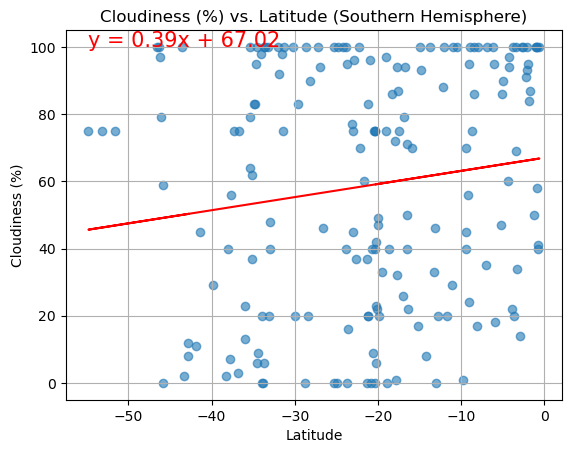

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere:Latitude vs Cloudiness

create_linear_regression_plot(southern_df["Lat"], southern_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern")



**Discussion about the linear relationship:** Latitude are Cloudiness positively related in both Northern and Southern  Hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03


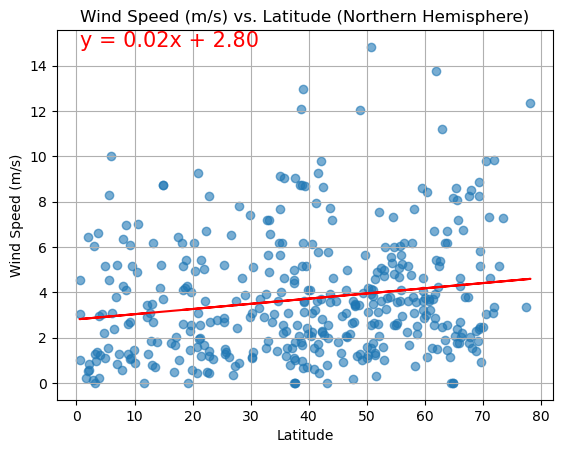

In [23]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere: Latitude vs Wind Speeds
create_linear_regression_plot(northern_df["Lat"], northern_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern")


The r-value is: 0.06


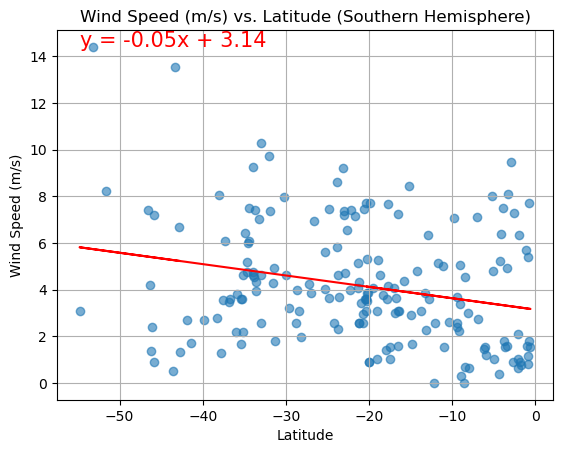

In [24]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere:Latitude vs Wind Speed
create_linear_regression_plot(southern_df["Lat"], southern_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE